<a href="https://colab.research.google.com/github/riyautekar25/AI_mini_project/blob/main/ShopDX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00


In [8]:
!pip install Dumper

In [9]:
from faker import Faker
fake = Faker()

In [10]:

data = pd.DataFrame()
for i in range(0, 10000):
    data.loc[i,'invoice_no']= fake.pyint()
    data.loc[i,'customer_id']= fake.pystr()
    data.loc[i,'gender']= fake.passport_gender()
    data.loc[i,'age']= randint(18,70)
    data.loc[i,'price']= randint(100,5000)
    data.loc[i,'invoice_date']= fake.date_time_between_dates('-5y','now')
    data.loc[i,'product_id']= randint(10000,99999)
    data.loc[i,'rating']= randint(1,5)
    data.loc[i,'prediction']= fake.paragraph()


In [11]:
data.head()

,invoice_no,customer_id,gender,age,price,invoice_date,product_id,rating,prediction
0,5748.0,jkLlaqIhSganEnIQqwwt,M,30.0,1905.0,2019-07-14 06:44:18.586388,83569.0,2.0,Standard different many car everyone. Myself r...
1,7458.0,kKUnmxdhPexrSoSjfrSH,F,40.0,1146.0,2023-04-26 08:16:30.366311,49848.0,5.0,Point pull give himself. Usually unit economic...
2,4988.0,EnfeTeyRFSwYMMcpHpMn,F,58.0,4574.0,2019-02-13 22:31:45.007998,80805.0,3.0,Nearly see man because member fish clear. View...
3,1353.0,zGCaPDErVFPanfLMCoET,F,27.0,145.0,2019-09-14 03:21:19.014337,92520.0,3.0,Lead require know by begin tax dream. Growth w...
4,5741.0,UprbHvuRnfZSieHwLgeO,M,52.0,774.0,2021-08-19 15:12:54.187038,82080.0,4.0,Team kind whom help enjoy hour next. Better ha...


Data is successfully created

In [12]:
data.shape

(10000, 9)

In [13]:
popular_products = pd.DataFrame(data.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
product_id,
64755.0,4
33749.0,3
83069.0,3
62019.0,3
79565.0,3
61058.0,3
28771.0,3
47666.0,3
35587.0,3


<Axes: xlabel='product_id'>

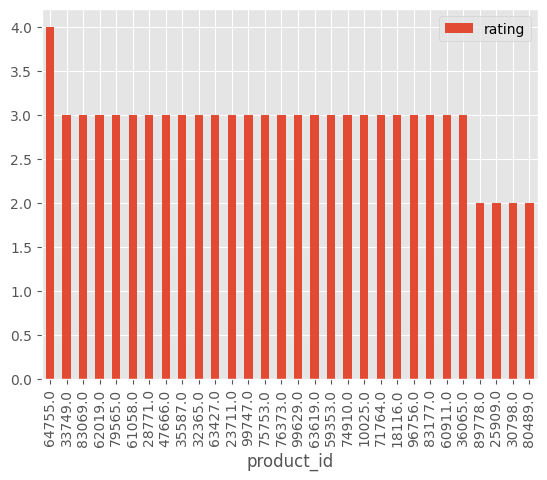

In [14]:
most_popular.head(30).plot(kind = "bar")

In [15]:
ratings_utility_matrix = data.pivot_table(values='rating', index='customer_id', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,10004.0,10007.0,10014.0,10021.0,10025.0,10034.0,10049.0,10054.0,10058.0,10067.0,...,99887.0,99899.0,99905.0,99915.0,99954.0,99960.0,99968.0,99969.0,99971.0,99987.0
customer_id,,,,,,,,,,,,,,,,,,,,,
AAVUfgsWHSIxUEBujnfu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAaqAtFXYZvPuYHcqPXg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAfWuwkknWQONzQFEgHk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAiQRickVksOMnOsmGAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABMjRmBOwfbDkWBTsGYr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
ratings_utility_matrix.shape

(10000, 9454)

In [17]:
X = ratings_utility_matrix.T
X.head()

customer_id,AAVUfgsWHSIxUEBujnfu,AAaqAtFXYZvPuYHcqPXg,AAfWuwkknWQONzQFEgHk,AAiQRickVksOMnOsmGAM,ABMjRmBOwfbDkWBTsGYr,ACHVHxnXZgiDyQwQXyXz,ACcEUCHfQKoxDSUuSqEY,ACcRwbywRSRAggbXBqWl,ACqurZSFzUwuEQbRTMig,ADAdGNgyGaUNFMhbtULj,...,zyCwrYRImCbcSTyUxkrx,zyTRnUUdCbgRiYatzhqp,zymSkPKQcqrWFdvbPmFg,zyrarVAQHMytemviMrZQ,zyzgGuEZMjKmxDChBKkB,zzXaANpSIAlePNMacvxy,zzcIgQBEXtDzYaFYKnNw,zzhvgjyEtvTmlQJwzaxI,zzjigPQikrOFFmPJuqib,zznsYyGaYiGbiCDxuvJL
product_id,,,,,,,,,,,,,,,,,,,,,
10004.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10007.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10014.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10021.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10025.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.shape

(9454, 10000)

In [19]:
X1 = X

In [20]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(9454, 10)

In [21]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(9454, 9454)

In [22]:
X.index[99]

10803.0

In [24]:
i = 10803.0

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [25]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(9454,)

In [26]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

[18874.0, 41294.0, 49262.0, 84295.0, 94805.0]

In [27]:
data1 = data.head(500)
data1["prediction"].head(10)

0    Standard different many car everyone. Myself r...
1    Point pull give himself. Usually unit economic...
2    Nearly see man because member fish clear. View...
3    Lead require know by begin tax dream. Growth w...
4    Team kind whom help enjoy hour next. Better ha...
5    Carry picture check this effort decade what re...
6    Fire write remain nor Republican represent. Wa...
7    Opportunity treatment reach. Describe low prep...
8    May second station whom daughter. Develop brea...
9    Once health ten stand. Season product carry hi...
Name: prediction, dtype: object

In [28]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(data1["prediction"])
X1

<500x763 sparse matrix of type '<class 'numpy.float64'>'
	with 5256 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



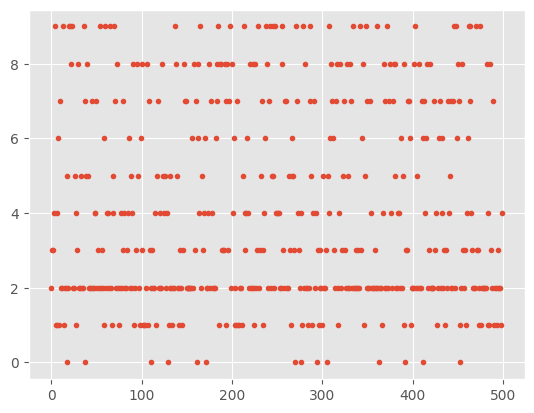

In [29]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [30]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 item
 tough
 maybe
 strong
 oil
 ask
 difficult
 price
 ok
 model
Cluster 1:
 chair
 surface
 moment
 guess
 say
 early
 glass
 win
 forward
 account
Cluster 2:
 idea
 product
 forget
 make
 deal
 factor
 trial
 worker
 hit
 bank
Cluster 3:
 current
 employee
 region
 plant
 senior
 parent
 maintain
 structure
 score
 right
Cluster 4:
 business
 north
 suggest
 especially
 able
 indicate
 million
 create
 visit
 scene
Cluster 5:
 gas
 war
 person
 stock
 doctor
 common
 space
 leader
 order
 knowledge
Cluster 6:
 expert
 drug
 cold
 pick
 certain
 letter
 evidence
 way
 religious
 question
Cluster 7:
 past
 wind
 know
 away
 peace
 low
 general
 particularly
 appear
 purpose
Cluster 8:
 affect
 color
 candidate
 night
 teach
 force
 really
 place
 ok
 arrive
Cluster 9:
 compare
 science
 program
 step
 investment
 voice
 far
 phone
 central
 century


In [31]:
print("Cluster ID:")
Y = vectorizer.transform(["book"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


In [32]:
print("Cluster ID:")
Y = vectorizer.transform(["gas"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[5]


In [33]:
print("Cluster ID:")
Y = vectorizer.transform(["color"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[8]


In [34]:
print("Cluster ID:")
Y = vectorizer.transform(["paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


In [35]:
print("Cluster ID:")
Y = vectorizer.transform(["office"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


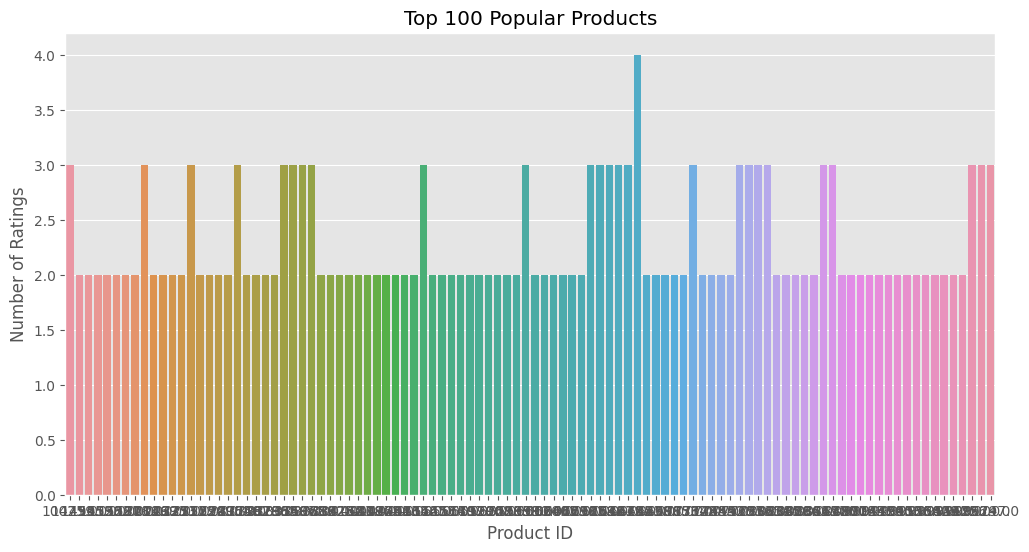

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_popular.head(100).index, y=most_popular.head(100)['rating'])
plt.title('Top 100 Popular Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.show()

In [37]:
pip install dash


In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [39]:
from dash import dcc
from dash import html

In [62]:
app = dash.Dash(__name__)

In [63]:
file_name = 'ShopDx.xlsx'
data.to_excel(file_name)